# Proyecto Cómo contar una historia utilizando datos

Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

## Tabla de contenidos <a id='back'></a>

1. [Inicialización](#inicialización-a-idintroa)
2. [Descarga de datos y preparación](#descarga-de-datos-y-preparación-a-iddescarga-preparaciona)
3. [Análisis de datos](#análisis-de-datos-a-idanalisisa)
4. [Conclusiones finales](#conclusiones)
5. [Presentación de resultados](#presentacion)

## Inicialización <a id="intro"></a>

Para iniciar nuestro proyecto vamos a cargar nuestras librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Descarga de datos y preparación <a id="descarga-preparacion"></a>

Vamos a cargar los datos del dataset `rest_data_us.csv`

In [2]:
# Carga los archivos de datos
data_rest = pd.read_csv('data/rest_data_us.csv')

# Verificamos que los datos se hayan cargado correctamente
data_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Vamos a estudiar los datos que contiene nuestro dataset y verificar que los tipos de datos sean correctos para nuestro análisis

In [3]:
# Imprimimos la información general/resumen sobre nuestro dataset
data_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Nuestro dataset `data_rest` que son los datos de los restaurantes en LA, contiene los siguientes datos:

- `id`: id del establecimiento
- `object_name`: nombre del establecimiento
- `chain`: establecimiento que pertenece a una cadena (TRUE/FALSE)
- `address `: dirección del establecimiento
- `object_type`: tipo de establecimiento
- `number`: número de asientos disponibles en el establecimiento

In [4]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_rest.duplicated().sum())

Datos duplicados en el dataset: 0


In [5]:
# Verificamos datos duplicados quitando el tipo de establecimiento y los asientos
print('Datos duplicados en el dataset:', data_rest.duplicated(subset=['id', 'object_name', 'address','chain']).sum())

Datos duplicados en el dataset: 0


In [6]:
# Verificamos datos duplicados solo con el id y el nombre
print('Datos duplicados en el dataset:', data_rest.duplicated(subset=['id', 'object_name']).sum())

Datos duplicados en el dataset: 0


In [7]:
# Se imprime una descripción de los datos
data_rest['number'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

#### Conclusiones del dataset

Al ver la muestra y resumen del dataset, no encontramos duplicados sin embargo tenemos 3 datos ausentes en la columna `chain`. Tambien es necesario ajustar los nombres de las columnas a nombres más representativos de los datos que contienen y ajustar la columna `chain` a boolean. Por último, gracias a la descripción de los datos numéricos vemos que la media de asientos es bastante superior a la mediana de esta, además de que el 75% de los datos no llega a superar los 46 asientos, todo esto nos indica la presencia de outliers

### Corregir datos

In [8]:
# Cambiar los nombres de las columnas
data_rest.rename(columns={"object_name": "name", "object_type": "type", "number": "seats"}, inplace=True)
# Cambiar el tipo de dato de chain de object a bool
data_rest['chain'] = data_rest['chain'].astype('bool')
data_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int64 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9651 non-null   bool  
 4   type     9651 non-null   object
 5   seats    9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


Podemos ver que al pasar la columna `chain` a boolean, se han corregido los datos ausentes

Con estas correcciones, nuestro dataset está listo para nuestro análisis.

## Análisis de datos <a id='analisis'></a>

Se deben hacer los siguientes análisis:

- Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.
- Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.
- ¿Qué tipo de establecimiento es habitualmente una cadena?
- ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?
- Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.
- Coloca los datos de los nombres de las calles de la columna address en una columna separada.
- Traza un gráfico de las diez mejores calles por número de restaurantes.
- Encuentra el número de calles que solo tienen un restaurante.
- Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

### Investigar las proporciones de los distintos tipos de establecimientos

Text(0, 0.5, 'Número de establecimientos')

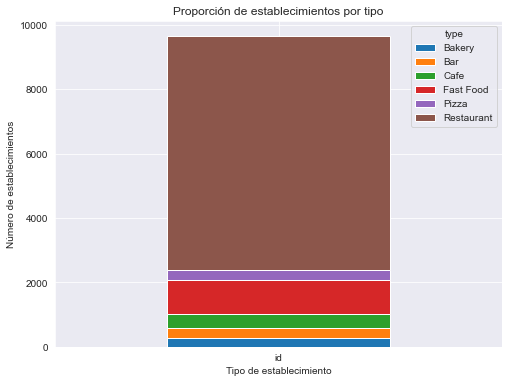

In [9]:
# Proporción de los distintos tipos de establecimientos
ax = pd.pivot_table(data_rest, values='id', columns='type', aggfunc='count').plot(kind='bar', stacked=True, figsize=(8, 6),
                                                                                  rot=0)
ax.set_title('Proporción de establecimientos por tipo')
ax.set_xlabel('Tipo de establecimiento')
ax.set_ylabel('Número de establecimientos')

#### Conclusiones propociones de tipos de establecimientos

Podemos notar por la gráfica que el 7000 de los establecimientos son restaurantes seguido por los tipo Fast Food con cerca de 1000 establecimientos

### Investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no.

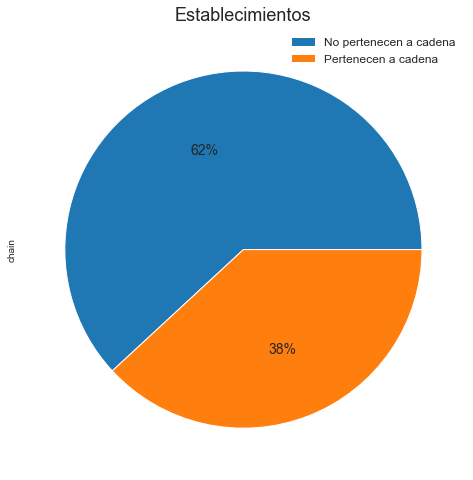

In [10]:
# Proporción de los establecimientos que pertenecen a una cadena y los que no
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots()
    ax = data_rest['chain'].value_counts().plot.pie(figsize=(8,10), autopct='%1.0f%%', textprops={'fontsize': 14}, labels=None)
    ax.set_title('Establecimientos', fontsize='18')
    ax.legend(labels=['No pertenecen a cadena', 'Pertenecen a cadena'], fontsize='12')
    fig.savefig("output2", facecolor='w', bbox_inches="tight",
                pad_inches=0.3, transparent=True)

#### Conclusiones propociones de establecimientos que pertenecen a una cadena y los que no

Podemos notar por la gráfica que el 62% de los establecimientos son negocios independientes mientras que el 38% pertenece a alguna cadena de comida

### ¿Qué tipo de establecimiento es habitualmente una cadena?

Text(0, 0.5, 'Número de establecimientos')

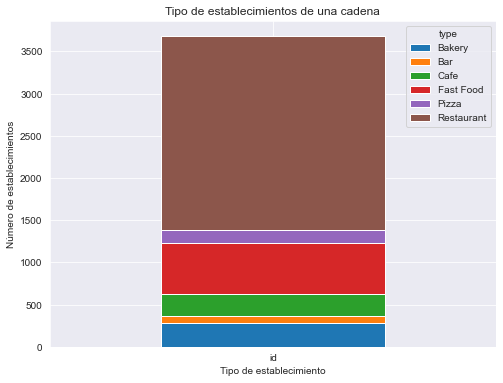

In [11]:
# Tipo de establecimientos que son de una cadena
# Tipo de establecimientos que son de una cadena
data_cadena = data_rest.query('chain == True')
ax = pd.pivot_table(data_cadena, values='id', columns='type', aggfunc='count').plot(kind='bar',
                                                                                    stacked=True,
                                                                                    figsize=(8, 6), rot=0)
ax.set_title('Tipo de establecimientos de una cadena')
ax.set_xlabel('Tipo de establecimiento')
ax.set_ylabel('Número de establecimientos')

#### Conclusiones tipo de establecimientos que son de cadena

Podemos notar por la gráfica que el 62% de los establecimientos que son de cadena pertenecen al segmento de restaurantes, seguido por un 16% que representa al segmento Fast Food

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

[Text(0.5, 1.0, 'Distribución de asientos en establecimientos de cadena')]

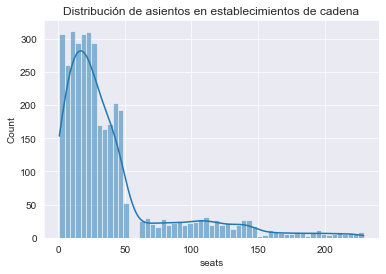

In [12]:
# Caracterizacion de las cadenas
data_cadena = data_rest.query('chain == True')
# Graficar distribución de lugares
fig, axes = plt.subplots()
sns.histplot(data=data_cadena, x='seats', kde=True).set(title='Distribución de asientos en establecimientos de cadena')

[Text(0.5, 1.0, 'Distribución de sucursales en establecimientos de cadena')]

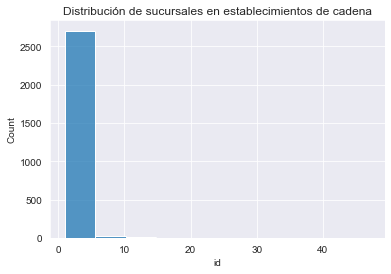

In [13]:
sns.histplot(data=data_cadena.groupby('name')['id'].count(), bins=10).set(title='Distribución de sucursales en establecimientos de cadena')

#### Conclusiones caracterización de las cadenas

Como podemos ver en los histogramas, la mayoria de las cadanas tienen de 1 a 5 sucursales abiertas, sin embargo en el tema de asientos la mayoria no sobrepasa de los 50 asientos. Con estos datos podemos decir que las cadenas se caracterizan en varias sucursales pero pocos asientos

### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

C:\Users\cavnv\AppData\Local\Temp\ipykernel_16300\2097408649.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3)


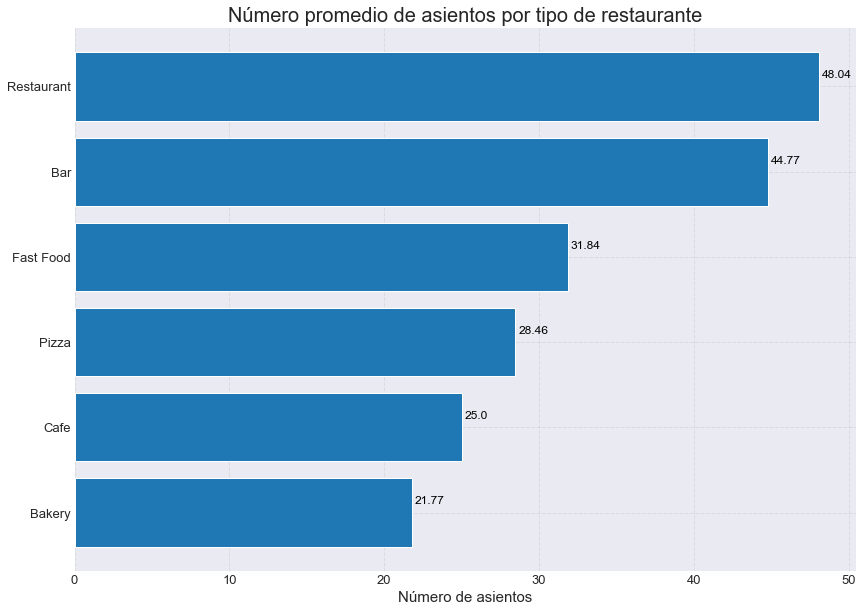

In [14]:
with plt.style.context('seaborn-dark'):

    fig, ax = plt.subplots(figsize=(14, 10))
    data_plot = data_rest.groupby('type')['seats'].mean().sort_values(ascending=True)
    ax.barh(data_plot.index, data_plot)
    # Add x, y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3)
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=12,color='black')
    ax.set_xlabel('Número de asientos', fontsize=15)
    ax.set_title('Número promedio de asientos por tipo de restaurante', fontsize=20)
    ax.tick_params(axis="y", labelsize=13)
    ax.tick_params(axis="x", labelsize=13)
    fig.savefig("output4", facecolor='w', bbox_inches="tight",
                pad_inches=0.3, transparent=True)

#### Conclusiones promedio de asientos para cada tipo de restaurante

Como podemos notar, los establecimientos tipo restaurante y bar son los que en promedio tienen mayor número de asientos con 48 y 44 asientos mientras que los tipo Cafe y Bakery son los que menos asientos tienen en promedio con 25 y 21 respectivamente.

### Coloca los datos de los nombres de las calles de la columna address en una columna separada y traza un gráfico de las diez mejores calles por número de restaurantes.

In [15]:
# Creamos una función para extraer la calle de la dirección
def get_street(row):
    address = row['address']
    c_points = ['N','S','W','E', 'NW', 'NE', 'SE', 'SW', 'NORTH', 'SOUTH', 'EAST', 'WEST',
                'NORTHEAST', 'SOUTHEAST', 'SOUTHWEST', 'NORTHWEST']
    result = re.sub('[0-9]{1,}[0-9]|#[A-Z]|#\s*(\S+)|#|\d+(?!\w)|\sSTE\s*(\S+)|/|\sLVL\s*(\S+)|\sSP\s*(\S+)', '', address)
    for i in c_points:
        result = re.sub(f'\s{i}\s', '', ''+result)
    return result

# Aplicamos la función
data_rest['street'] = data_rest.apply(get_street, axis=1)

# Verificamos el resultado
data_rest.head()

,id,name,address,chain,type,seats,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


C:\Users\cavnv\AppData\Local\Temp\ipykernel_16300\434412352.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3)


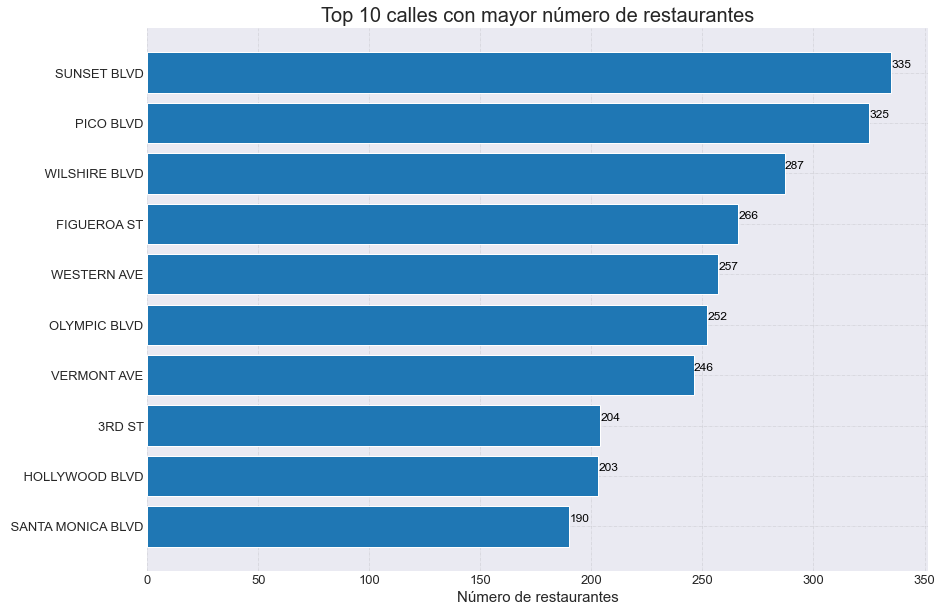

In [16]:
# Gráficos el top 10 calles por número de restaurantes
top_10_streets = data_rest['street'].value_counts()[0:10].sort_values(ascending=True)
with plt.style.context('seaborn-dark'):

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.barh(top_10_streets.index, top_10_streets)
    # Add x, y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3)
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=12,color='black')
    ax.set_xlabel('Número de restaurantes', fontsize=15)
    ax.set_title('Top 10 calles con mayor número de restaurantes', fontsize=20)
    ax.tick_params(axis="y", labelsize=13)
    ax.tick_params(axis="x", labelsize=13)
    fig.savefig("output5", facecolor='w', bbox_inches="tight",
                pad_inches=0.3, transparent=True)

#### Conclusiones top 10 calles con mayor número de restaurantes

Guiados por la gráfica, podemos ver que los boulevard (BLVD) son las que más presencia tienen en el top 10, especificamente el Sunset, Pico y Wilshire Boulevard que representa nuestro top 3.

### Encuentra el número de calles que solo tienen un restaurante.

In [17]:
# Filtramos nuestro dataset seleccionando las calles que solo tienen un restaurante
print('El número de calles con solo un restaurante es:', data_rest.groupby('street')['id'].count().reset_index().query('id == 1').shape[0])

El número de calles con solo un restaurante es: 578


### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

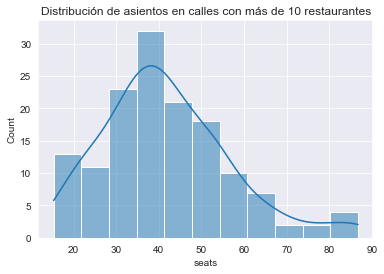

In [18]:
# Seleccionamos las calles que tienen más de 10 restaurantes
streets_more_10 = data_rest.groupby('street')['id'].count().reset_index().query('id > 10')['street'].tolist()
data_filtered = data_rest[data_rest['street'].isin(streets_more_10)]
data_filtered = data_filtered.groupby('street')['seats'].mean().reset_index()

# Graficar distribución de lugares
fig, axes = plt.subplots()
sns.histplot(data=data_filtered, x='seats', kde=True).set(title='Distribución de asientos en calles con más de 10 restaurantes')
fig.savefig("output6", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

#### Conclusiones distribución de número de asientos en las calles con más de 10 restaurantes

Podemos ver por la gráfica que la distrubición es casi normal, teniendo a más de 30 calles con una media de 40 asientos por restaurante.

## Conclusiones finales <a id='conclusiones'></a>

Como conclusión final de nuestro análisis, descubrimos lo siguiente:
- El tipo de establecimiento que más predomina es el de restaurantes con 75.2%, seguido por la comida rápida con un 11%. Los tipo cafeteria tienen el 3er puesto con 4.5% del mercado.
- El 38% de los establecimientos pertenecen a una cadena vs los 68% que son establecimientos independientes. De los establecimientos de cadena, la mayoria de estos son restaurantes (62.4%) seguidos una vez más por comida rápida (16.4%). Los tipo cafeteria tienen el 4to puesto con un 7.2%
- La mayoria de estas cadenas no sobrepasan los 5 establecimientos y su media de asientos es de 50.
- En promedio, los tipos de establecimientos con mayor número de asientos son los restaurantes con 48 asientos, seguidos por los bares con 44 asientos. Los tipo cafeteria tienen un media de 25 asientos.
- Los boulevard son los tipos de calle que más establecimientos tienen siendo el Sunset Blvd el top 1 con 335 establecimientos. Sin embargo, vemos un total de 578 calles que solo cuentan con un establecimiento y pueden ser opciones a tomar en cuenta para la localización del local y evitar la saturación y competencia tan reñida, sin embargo las calles con mayor número de establecimientos son en general las calles más transitadas. Entre las calles más concurridas, la mayoria de sus restaurantes tiene una media de 40 asientos.

Teniendo en cuenta que se desea abrir un establecimiento de tipo cafeteria, tenemos las siguientes recomendaciones:

1. El tipo elegido lo consideramos optimo ya que la cuota de mercado no es muy alta y hay más posibilidad de sobresalir.
2. Viendo el promedio de asientos entre el tipo de establecimiento y el de las calles con más restaurantes, el número de asientos dependera de la localización elegida. Si se elige una calle con pocos establecimientos, se recomienda un número reducido de asientos, entre 25 y 30 asientos. Sin embargo, si elige una calle con gran número de establecimientos (y seguramente mayor transito) se recomienda entre 40 y 50 asientos para cubrir la posible demanda.
3. La posibilidad de desarrollar una cadena es viable tomando en cuenta que la mayoria de los establecimientos es independiente por lo que no esta saturado de cadenas, y de los establecimientos que son cadena, solo el 7.2% es cafeteria por lo que hay un buen margen para hacer crecer la marca y poder abarcar más mercado.

## Presentación de resultados
<https://drive.google.com/file/d/10TFvybjvWxDrfzO6XRyamvxkdhEhmyjD/view?usp=sharing>